In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import plotly.express as px # to plot the time series plot
 from sklearn import metrics # for the evaluation
 from sklearn.preprocessing import LabelEncoder,MinMaxScaler
 import tensorflow as tf 

In [3]:
cd '/content/drive/MyDrive/2022/공모전'

/content/drive/MyDrive/2022/공모전


In [4]:
#data불러오기
train = pd.read_csv('train.csv', encoding= 'unicode_escape')
submission = pd.read_csv('submission.csv', encoding= 'unicode_escape')
singapore = pd.read_csv('singapore.csv')

In [7]:
# 변수명 변경
train.columns = ['기간','한국_수출금액', '한국의_중국_수출', '한국의_미국_수출', '한국의_베트남_수출','한국의_홍콩_수출','한국의_일본_수출']
singapore.columns = ['기간','한국의_싱가포르_수출']
submission.columns = ['기간','한국_수출금액']

In [9]:
# 기간 날짜데이터로 바꿔주기
train['기간'] = pd.to_datetime(train['기간'])
submission['기간'] = pd.to_datetime(submission['기간'])
singapore['기간'] = singapore['기간'].astype(str).str.replace('.', '-')
singapore['기간'] = pd.to_datetime(singapore['기간'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [10]:
# train 데이터와 singapore 데이터를 합쳐준다.
df = pd.merge(train,singapore)

In [11]:
df = df[1:]

In [12]:
df.shape

(263, 8)

In [13]:
# 문자형으로 되어있는 숫자 데이터를 숫자형으로 바꿔주기 위해 replace를 사용한다. ex) '123456'
df['한국_수출금액'] = df['한국_수출금액'].str.replace(",", "")
df['한국의_중국_수출'] = df['한국의_중국_수출'].str.replace(",", "")
df['한국의_미국_수출'] = df['한국의_미국_수출'].str.replace(",", "")
df['한국의_베트남_수출'] = df['한국의_베트남_수출'].str.replace(",", "")
df['한국의_홍콩_수출'] = df['한국의_홍콩_수출'].str.replace(",", "")
df['한국의_일본_수출'] = df['한국의_일본_수출'].str.replace(",", "")
df['한국의_싱가포르_수출'] = df['한국의_싱가포르_수출'].str.replace(",", "")

In [14]:
# 문자형으로 되어있는 숫자 데이터를 숫자형으로 바꿔주기 위해 replace를 사용한다. ex) '123456 '
df['한국_수출금액'] = df['한국_수출금액'].str.replace(" ", "")
df['한국의_중국_수출'] = df['한국의_중국_수출'].str.replace(" ", "")
df['한국의_미국_수출'] = df['한국의_미국_수출'].str.replace(" ", "")
df['한국의_베트남_수출'] = df['한국의_베트남_수출'].str.replace(" ", "")
df['한국의_홍콩_수출'] = df['한국의_홍콩_수출'].str.replace(" ", "")
df['한국의_일본_수출'] = df['한국의_일본_수출'].str.replace(" ", "")
df['한국의_싱가포르_수출'] = df['한국의_싱가포르_수출'].str.replace(" ", "")

In [15]:
# 숫자형으로 변환해준다.
df["한국_수출금액"] = pd.to_numeric(df["한국_수출금액"])
df["한국의_중국_수출"] = pd.to_numeric(df["한국의_중국_수출"])
df["한국의_미국_수출"] = pd.to_numeric(df["한국의_미국_수출"])
df["한국의_베트남_수출"] = pd.to_numeric(df["한국의_베트남_수출"])
df["한국의_홍콩_수출"] = pd.to_numeric(df["한국의_홍콩_수출"])
df["한국의_일본_수출"] = pd.to_numeric(df["한국의_일본_수출"])
df["한국의_싱가포르_수출"] = pd.to_numeric(df["한국의_싱가포르_수출"])

### VAR

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


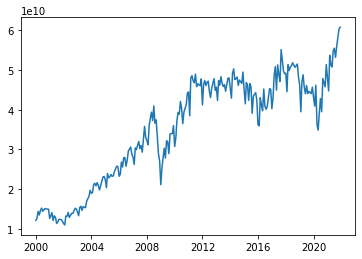

In [20]:
plt.plot(df['기간'],df['한국_수출금액'])

### LSTM

문자형 -> 숫자형

In [ ]:
df

,기간,한국_수출금액,한국의_중국_수출,한국의_미국_수출,한국의_베트남_수출,한국의_홍콩_수출,한국의_일본_수출,한국의_싱가포르_수출
1,2000-01-01,"12,162,424,632","1,235,215,271","2,609,787,984","109,742,698","782,348,732","1,551,722,070","446,435"
2,2000-02-01,"12,676,042,304","1,273,117,309","2,554,309,883","112,395,157","823,990,122","1,518,844,843","379,588"
3,2000-03-01,"14,429,703,086","1,437,377,223","2,946,820,669","150,134,562","911,648,256","1,783,564,618","611,323"
4,2000-04-01,"13,522,040,017","1,366,876,604","2,698,029,849","169,146,208","863,243,219","1,582,707,525","430,097"
5,2000-05-01,"14,636,754,971","1,663,240,667","3,167,181,403","169,411,680","887,081,090","1,671,039,709","551,510"
...,...,...,...,...,...,...,...,...
259,2021-07-01,"55,461,518,159","13,586,374,429","8,724,015,829","4,934,034,094","2,872,361,283","2,565,013,671","1,582,735"
260,2021-08-01,"53,165,103,786","13,881,327,880","7,704,223,847","4,850,337,611","3,415,828,590","2,522,980,082","1,116,604"
261,2021-09-01,"55,913,862,375","14,291,980,345","7,983,934,107","5,101,701,490","3,852,088,155","2,541,017,857","1,332,202"
262,2021-11-01,"60,330,542,263","15,272,549,044","8,133,640,339","5,478,296,945","3,232,583,381","2,813,250,497","1,463,579"


In [ ]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_df = X_scaler.fit_transform(df[['한국의_중국_수출','한국의_미국_수출','한국의_베트남_수출','한국의_홍콩_수출','한국의_일본_수출','한국의_싱가포르_수출']])
Y_df = Y_scaler.fit_transform(df[['한국_수출금액']])

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y) 

In [ ]:
 hist_window = 12
 horizon = 6
 TRAIN_SPLIT = 200
 x_train, y_train = custom_ts_multi_data_prep(X_df, Y_df, 0, TRAIN_SPLIT, hist_window, horizon)
 x_vali, y_vali = custom_ts_multi_data_prep(X_df, Y_df, TRAIN_SPLIT, None, hist_window, horizon) 

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.00000000e+00 5.24739380e-02 2.70035107e-03 2.92856979e-02
  1.86491284e-01 6.71497847e-02]
 [2.68668779e-03 4.39648672e-02 3.18067827e-03 3.90947601e-02
  1.74154617e-01 3.96459603e-02]
 [1.43302597e-02 1.04167037e-01 1.00148132e-02 5.97435446e-02
  2.73486590e-01 1.34992030e-01]
 [9.33281993e-03 6.60082202e-02 1.34575849e-02 4.83412351e-02
  1.98118094e-01 6.04276059e-02]
 [3.03406008e-02 1.37965330e-01 1.35056585e-02 5.39564933e-02
  2.31263370e-01 1.10382306e-01]
 [2.84783535e-02 1.45296976e-01 1.11679437e-02 5.31200299e-02
  2.31033678e-01 6.76221229e-02]
 [2.63345163e-02 1.51558046e-01 7.70713718e-03 5.01669424e-02
  2.21712989e-01 6.93160395e-02]
 [3.19307754e-02 1.53287241e-01 4.74907938e-03 6.25767378e-02
  2.33891776e-01 1.06500739e-01]
 [2.53171576e-02 1.90697512e-01 5.99226579e-03 6.73304203e-02
  3.17223715e-01 9.15077051e-02]
 [3.49648014e-02 1.63142622e-01 1.01275103e-02 6.73977785e-02
  3.08893370e-01 6.35805044e-02]
 [2.64783086e-02 

In [ ]:
batch_size = 64
buffer_size = 300
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(units=horizon),
 ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 12, 400)          331200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 12, 20)            8020      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [ ]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint] 
history = lstm_model.fit(train_data,epochs=100,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)


Epoch 1/100
100/100 [==============================] - 3s 30ms/step - loss: 0.0035 - val_loss: 0.0327
Epoch 2/100
100/100 [==============================] - 2s 21ms/step - loss: 0.0033 - val_loss: 0.0281
Epoch 3/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0032 - val_loss: 0.0271
Epoch 4/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0031 - val_loss: 0.0316
Epoch 5/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0031 - val_loss: 0.0267
Epoch 6/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0253
Epoch 7/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0219
Epoch 8/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0029 - val_loss: 0.0247
Epoch 9/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 0.0201
Epoch 10/100
100/100 [==============================] - 1s 15ms/step - loss: 0.002

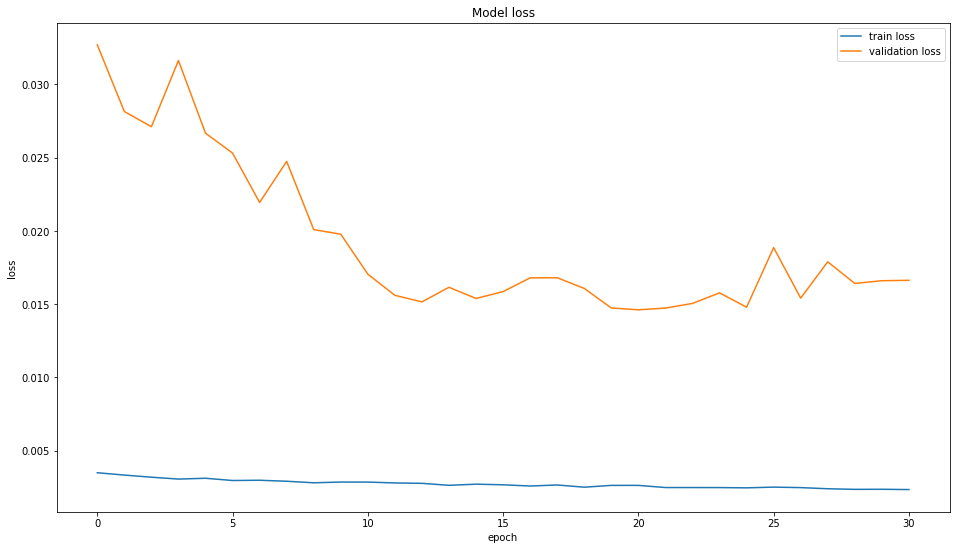

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [ ]:
data_val = X_scaler.fit_transform(df[['한국의_중국_수출','한국의_미국_수출','한국의_베트남_수출','한국의_홍콩_수출','한국의_일본_수출','한국의_싱가포르_수출']].tail(48))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred = lstm_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse 

ValueError: ignored